# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


#### Отберем более информативные и понятные признаки. Уберем признаки без описания.

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции

* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* income	доход клиента
* nbi	доход от клиента без OPEX

In [5]:
df = df.loc[:,['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 
         'dc_trx_cnt', 'dc_trx_sum', 'Avg_trx', 'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y', 'income', 
         'nbi']]
df.head()

,age,gender,city_type,full_mob,ml_balance,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,Avg_trx,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,income,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0000,0,0.00,NaN,0.0000,0.0000,0.000000,0.0,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,3272.9367,0,0.00,NaN,3272.9367,4280.1960,4716.127317,0.0,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,6249.7550,6,5128.02,854.67,6249.7550,10311.6588,10239.601283,0.0,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,14354.9370,0,0.00,NaN,14354.9370,15086.7999,13905.841283,0.0,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,91511.7691,0,0.00,NaN,91511.7691,93649.4406,96089.612758,0.0,6651.416562


#### Посмотрим количество пропусков

In [6]:
df.isnull().sum()

age                        0
gender                   723
city_type                  0
full_mob                   0
ml_balance                 0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
Avg_trx                17872
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
income                     0
nbi                     2431
dtype: int64

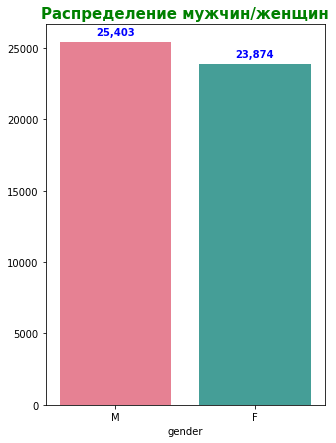

In [7]:
plt.figure(figsize=(5,7))
b = sns.barplot(
    x='gender', 
    y=[1]*50000, 
    data=df, 
    estimator=sum, 
    palette='husl')

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )
plt.title('Распределение мужчин/женщин', size=15, color='g', weight='bold');

### Распределение людей по городам с ипотеками

In [8]:
df['is_ipoteka'] = (df.ml_balance > 0).replace({False:0, True:1})

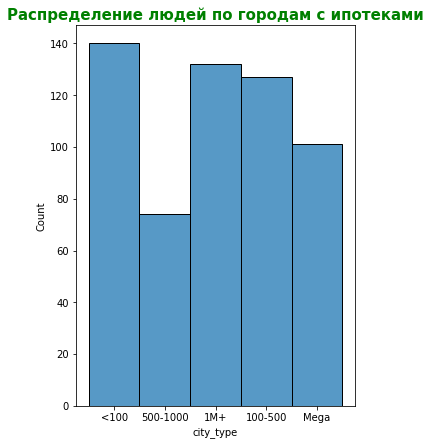

In [9]:
plt.figure(figsize=(5,7))
sns.histplot(data=df.query('is_ipoteka > 0'), x='city_type');
plt.title('Распределение людей по городам с ипотеками', size=15, color='g', weight='bold');

Больше всего людей берут ипотеку в городах с населением меньше 100 т.

#### Построим распределение стоимости ипотеки

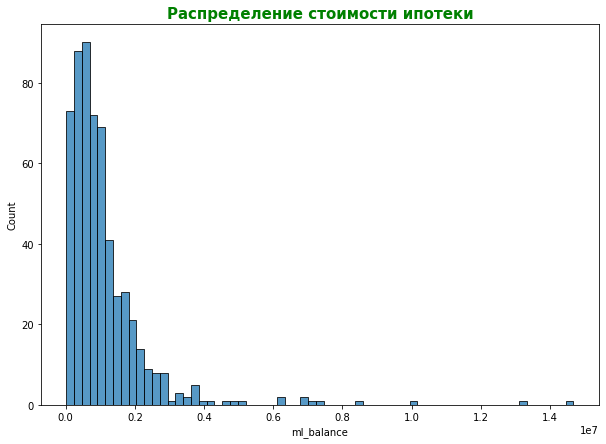

In [10]:
plt.figure(figsize=(10,7))
sns.histplot(df.query('is_ipoteka > 0').ml_balance)
plt.title('Распределение стоимости ипотеки', size=15, color='g', weight='bold');

In [12]:
df

,age,gender,city_type,full_mob,ml_balance,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,Avg_trx,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,income,nbi,is_ipoteka
0,71,NaN,<100,103,0.0,0.00,0.0,0.0000,0,0.00,NaN,0.0000,0.0000,0.000000,0.00,NaN,0
1,49,NaN,Mega,81,0.0,0.00,0.0,3272.9367,0,0.00,NaN,3272.9367,4280.1960,4716.127317,0.00,28.762952,0
2,56,NaN,Mega,81,0.0,0.00,0.0,6249.7550,6,5128.02,854.670000,6249.7550,10311.6588,10239.601283,0.00,1973.335539,0
3,47,NaN,Mega,81,0.0,0.00,0.0,14354.9370,0,0.00,NaN,14354.9370,15086.7999,13905.841283,0.00,364.008556,0
4,74,NaN,Mega,81,0.0,0.00,0.0,91511.7691,0,0.00,NaN,91511.7691,93649.4406,96089.612758,0.00,6651.416562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.00,1247018.0,0.8800,0,0.00,NaN,0.8800,0.8800,2003.093333,0.00,13775.933155,0
49996,58,F,Mega,34,0.0,0.00,1000000.0,0.0000,0,0.00,NaN,0.0000,0.0000,0.000000,0.00,8247.466438,0
49997,34,М,1M+,21,0.0,0.00,0.0,6450.9300,73,118358.38,1621.347671,3795.8800,7544.1900,9010.019167,12405.50,1973.128710,0
49998,43,М,<100,52,0.0,39318.52,0.0,4101.1200,0,0.00,NaN,3078.0000,4101.1200,3787.540000,0.00,5101.543269,0


Чаще всего сумма ~ 1 млн.

<Figure size 720x864 with 0 Axes>

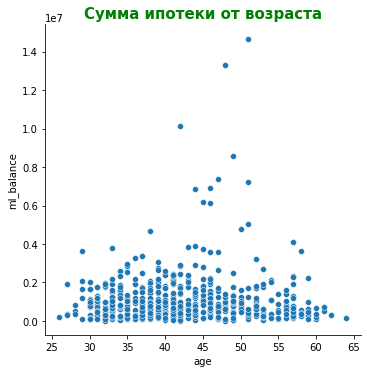

In [20]:
plt.figure(figsize=(10,12))
sns.relplot(
    x='age',
    y='ml_balance',
    data=df.query('is_ipoteka > 0')
);
plt.title('Сумма ипотеки от возраста', size=15, color='g', weight='bold');

In [23]:
df.query('is_ipoteka > 0').age.value_counts().head(6)

38    34
41    33
37    32
39    31
42    26
33    25
Name: age, dtype: int64

Чаще всего ипотеку берут в возрасте от 33 до 42

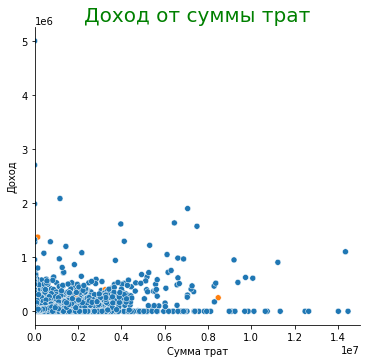

In [42]:
sns.relplot(
    x='dc_trx_sum',
    y='income',
    hue='is_ipoteka', 
    markers=['^', 'D'],
    data=df.query('income < 3*1e7'), legend=False)
plt.xlim((0, 1.5e7))
plt.xlabel('Сумма трат')
plt.ylabel("Доход")
plt.title('Доход от суммы трат', size=20, color='g');

#### Сделаем признак наличия кредита

In [48]:
df['credit'] = (df.loan_balance_0m > 0).replace({False : 'Нет', True : 'Да'})

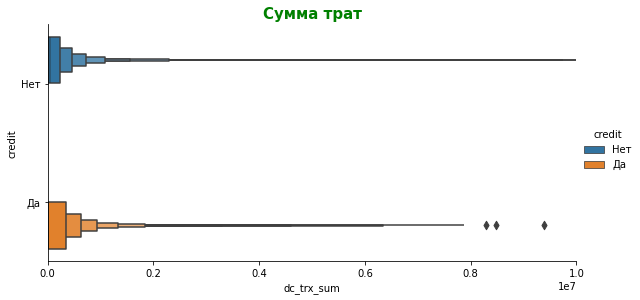

In [56]:
sns.catplot(
    x='dc_trx_sum', 
    y='credit',
    hue='credit',
    data=df, 
    kind='boxen', 
    height=4, 
    aspect=2); 
plt.xlim((0,1e7));
plt.title('Сумма трат', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='gender',
    y='dc_trx_cnt', 
    data=df, 
    hue='credit',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');